# Import dependences

In [3]:
import re
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

# Load Data

In [4]:
data_path = 'data/fpt_1d_20180816_20240816.csv'
df = pd.read_csv(data_path)
df.head()

,Date,Adj Close,Open,High,Low,Close,Volume
0,2018-08-16,18233.41,18581.98,18625.29,18387.06,18625.29,3182706
1,2018-08-17,18445.43,18711.92,18841.87,18625.29,18841.87,2142576
2,2018-08-20,18530.24,18841.87,19188.38,18690.27,18928.50,2205416
3,2018-08-21,18530.24,18885.18,18971.81,18798.55,18928.50,1979951
4,2018-08-22,18678.65,18950.15,19188.38,18928.50,19080.10,3312563


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 1. What was the change in price of the stock overtime?

In [6]:
df.describe()

,Adj Close,Open,High,Low,Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,50419.079167,51223.279627,51803.399100,50690.609527,51253.886080,3.746741e+06
std,27873.166448,27970.306711,28307.869503,27649.006786,27982.491888,2.609337e+06
min,17300.540000,17325.860000,17888.950000,17325.860000,17672.370000,2.922720e+05
25%,25639.990000,26205.360000,26443.590000,25965.040000,26191.060000,1.872506e+06
50%,54314.685000,55545.055000,56194.075000,54480.150000,55482.045000,3.123012e+06
75%,62873.642500,64272.210000,64877.120000,63686.202500,64224.952500,4.836474e+06
max,139600.000000,139100.000000,139700.000000,137500.000000,139600.000000,1.927216e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2018-08-16 to 2024-08-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1500 non-null   float64
 1   Open       1500 non-null   float64
 2   High       1500 non-null   float64
 3   Low        1500 non-null   float64
 4   Close      1500 non-null   float64
 5   Volume     1500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.0 KB


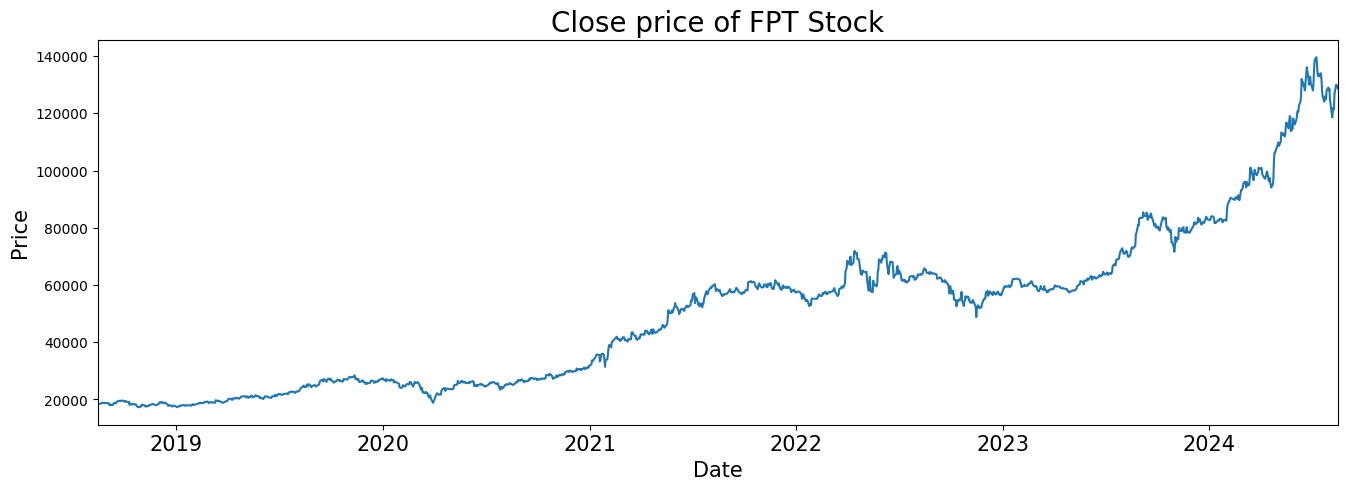

In [8]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df.index, df['Adj Close'])

# Adding a plot title and customizing its font size
plt.title('Close price of FPT Stock', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=0, fontsize=15)

plt.xlim(df.index.min(), df.index.max())

plt.show()

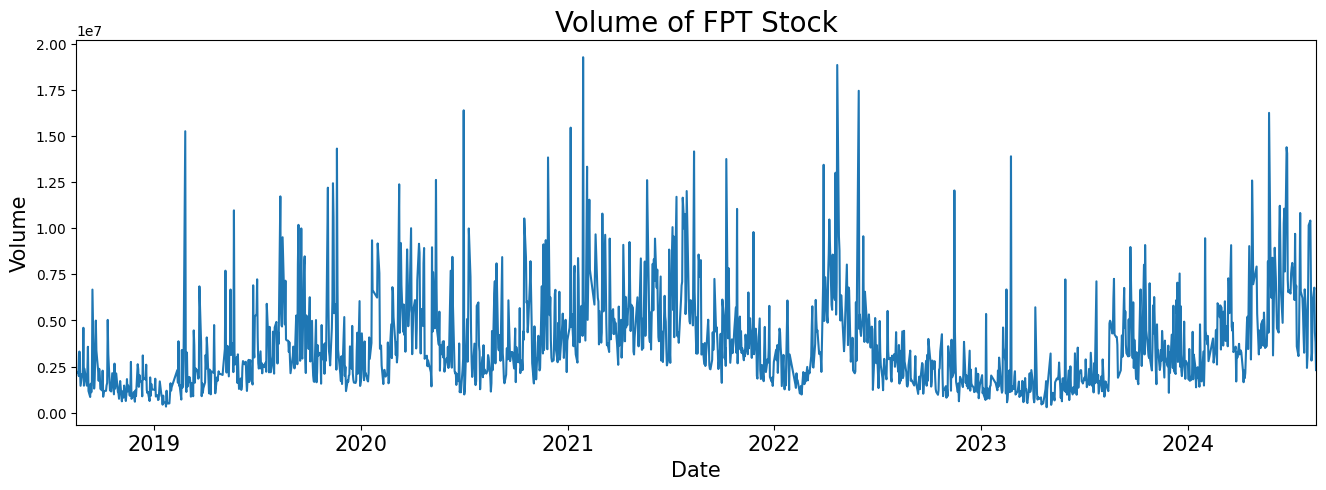

In [9]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df.index, df['Volume'])

# Adding a plot title and customizing its font size
plt.title('Volume of FPT Stock', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=0, fontsize=15)

plt.xlim(df.index.min(), df.index.max())

plt.show()

# 2. What was the moving average of the various stocks?

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'FPT Corporation')

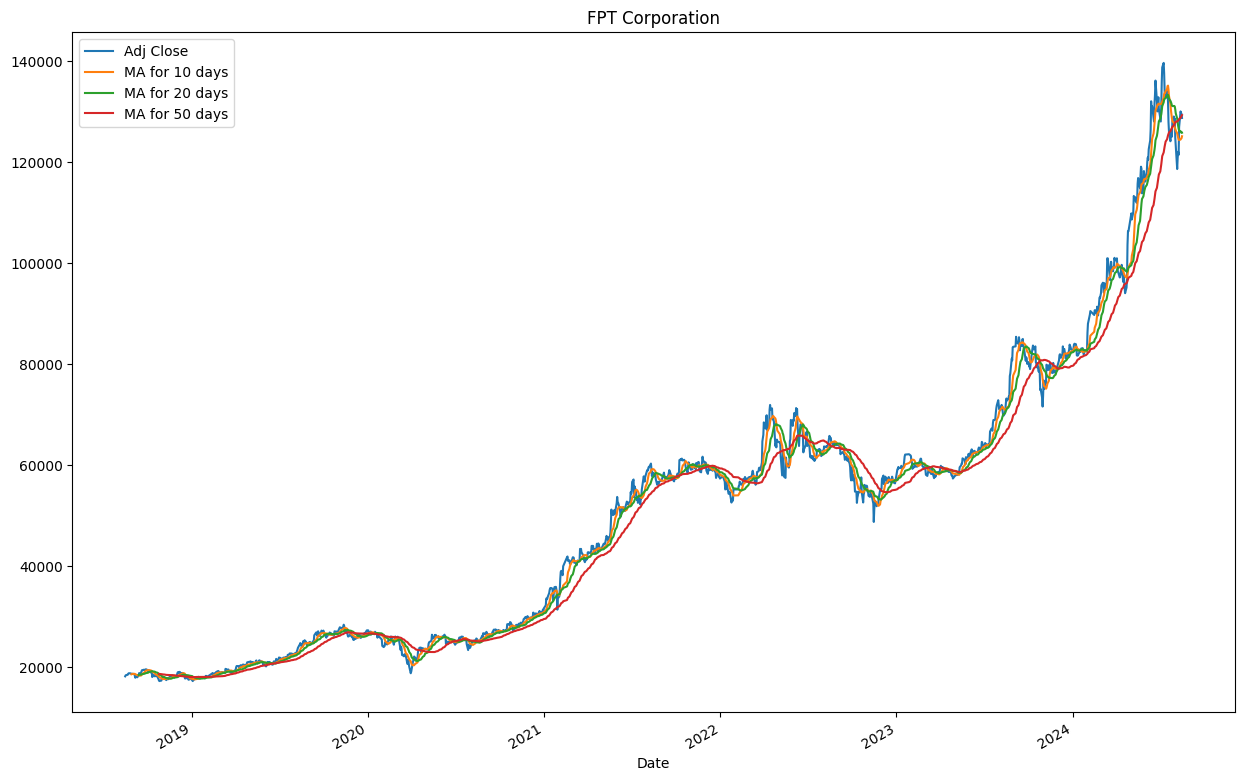

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
ax.set_title('FPT Corporation')

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

Text(0.5, 1.0, 'FPT Corporation')

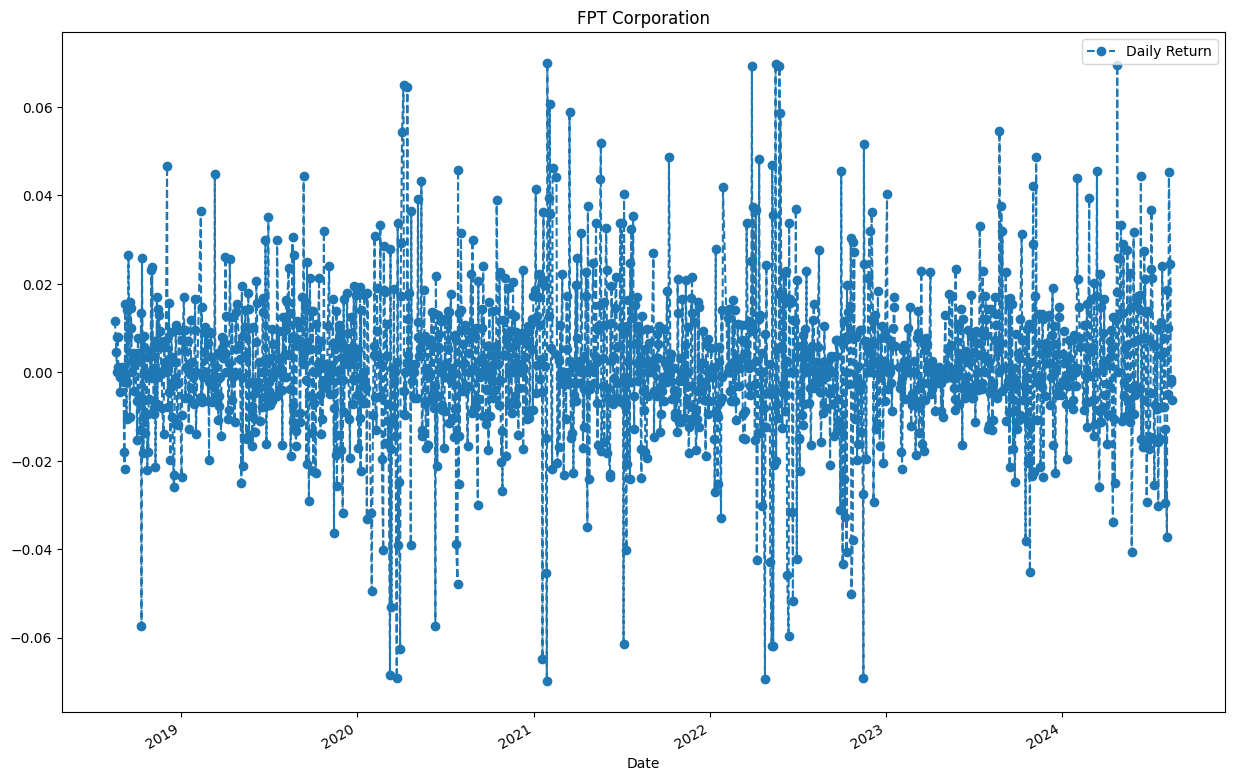

In [12]:
df['Daily Return'] = df['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
ax.set_title('FPT Corporation')

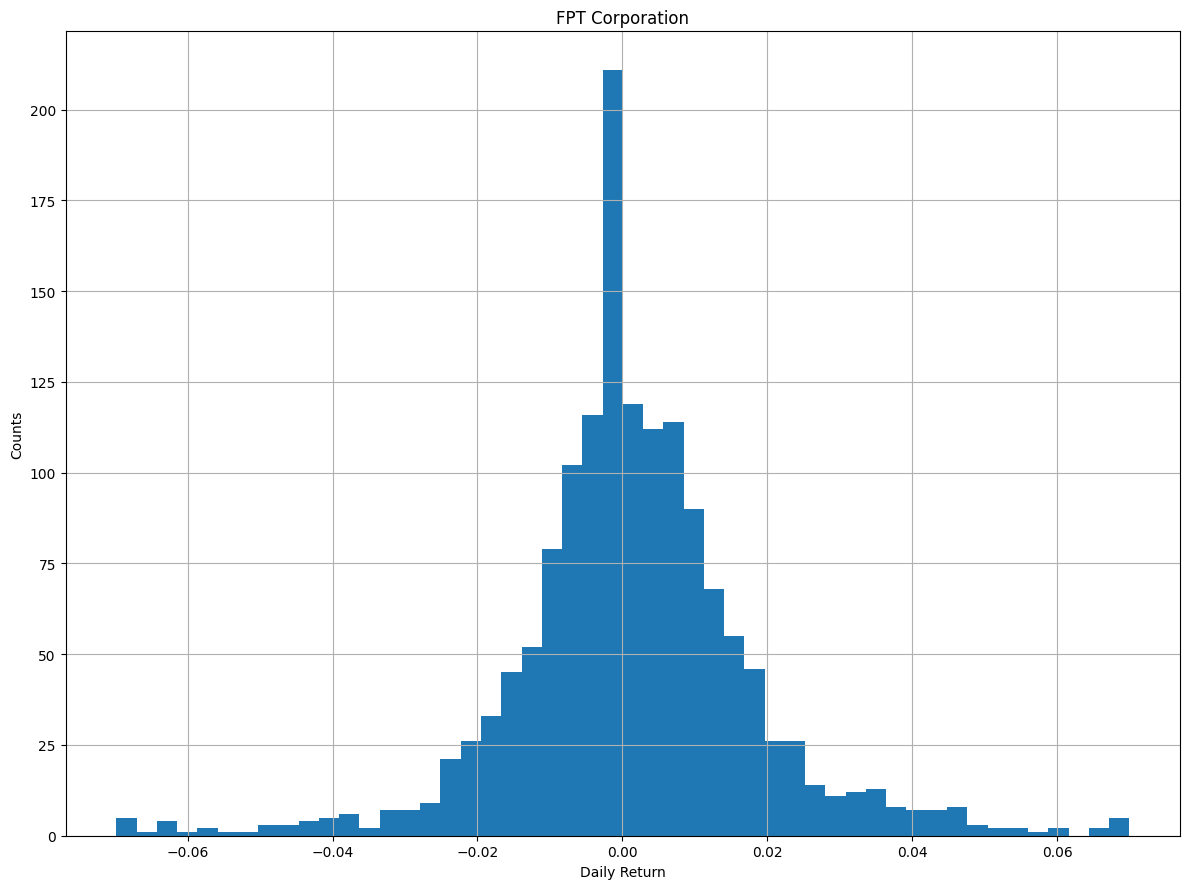

In [13]:
plt.figure(figsize=(12, 9))

df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('FPT Corporation')
    
plt.tight_layout()

# 4. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

Text(50, 50, 'FPT')

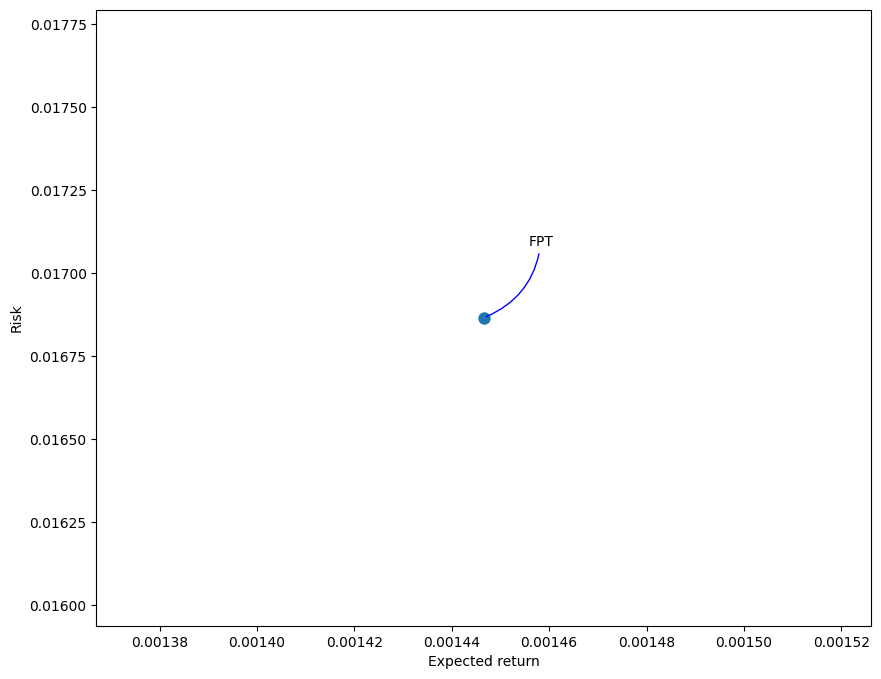

In [14]:
df['Daily Return'].dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(df['Daily Return'].mean(), df['Daily Return'].std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

plt.annotate('FPT', xy=(df['Daily Return'].mean(), df['Daily Return'].std()), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


# Predict

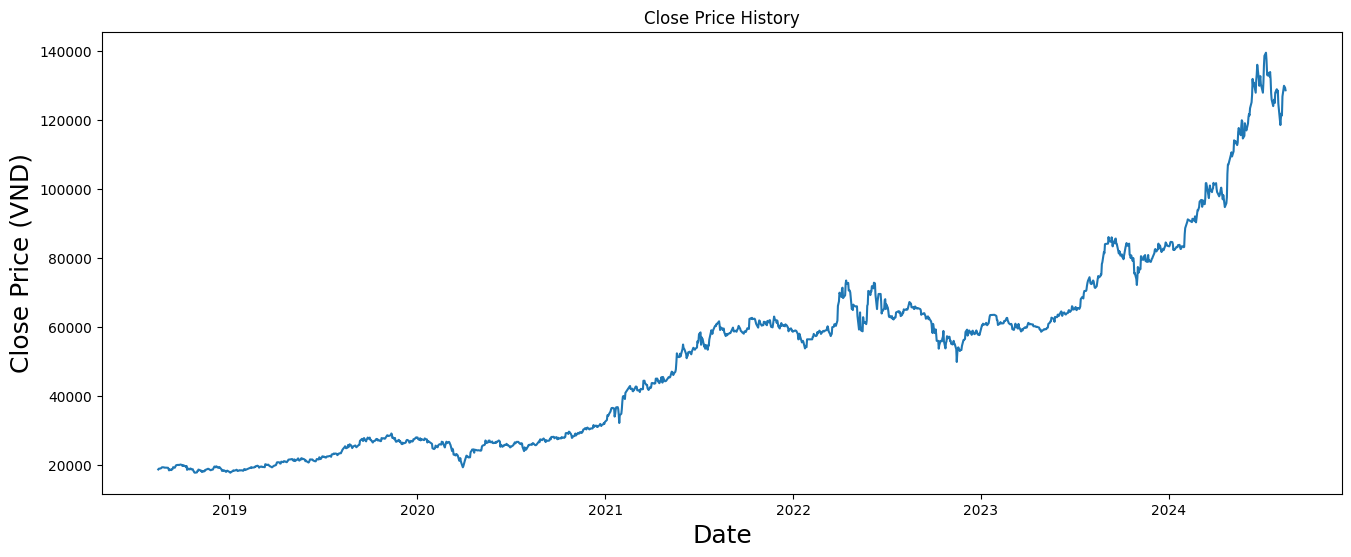

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.show()

# Preprocess data

In [16]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

1200

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00781546],
       [0.00959176],
       [0.01030226],
       ...,
       [0.91880429],
       [0.91716398],
       [0.91060271]])

# Split data into train and test set

In [18]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # if i<= 61:
    #     print(x_train)
    #     print(y_train)
    #     print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape, y_train.shape

((1140, 60), (1140,))

In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

x_test.shape, y_test.shape

((300, 60), (300, 1))

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

# Tạo model
model = LinearRegression()

# Train model
model.fit(x_train, y_train)

LinearRegression()

In [42]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform([predictions])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

29680.781833985406

/var/folders/t6/86wyndb17fgdq0_j3t6qbkwh0000gn/T/ipykernel_86447/2792459284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[0]


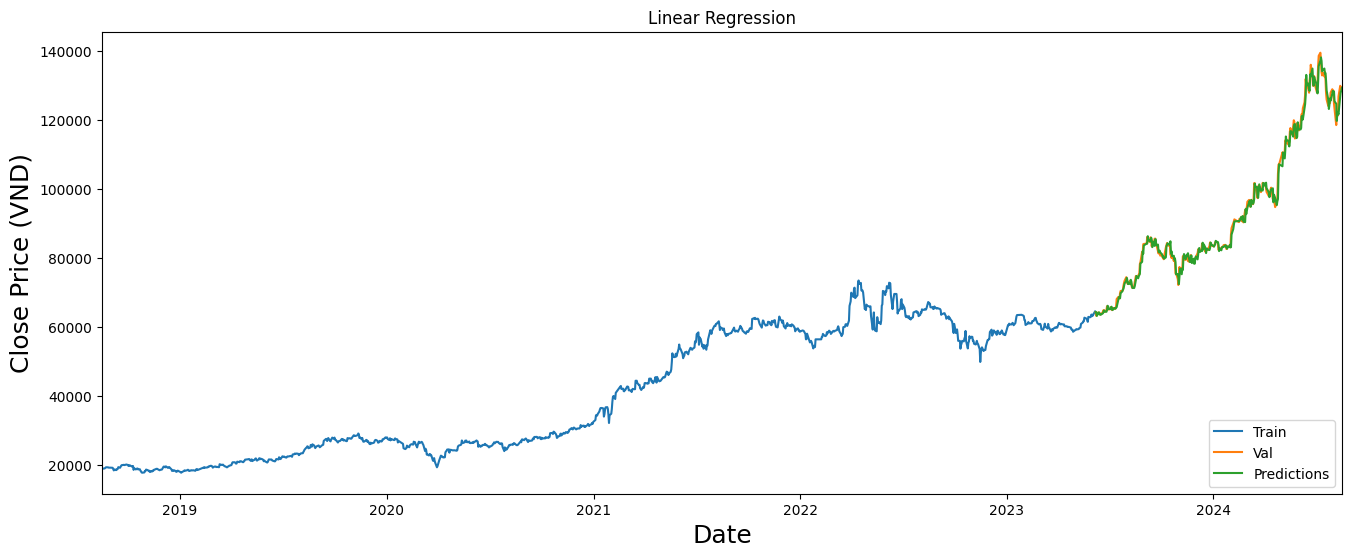

In [43]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions[0]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlim(df.index.min(), df.index.max())
plt.show()

# LSTM

In [100]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape, y_train.shape

((1140, 60, 1), (1140,))

In [101]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

x_test.shape, y_test.shape

((300, 60, 1), (300, 1))

In [102]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=1)

570/570 [==============================] - 8s 12ms/step - loss: 5.2554e-04


In [103]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 2s 169ms/step


3567.877184632401

/var/folders/t6/86wyndb17fgdq0_j3t6qbkwh0000gn/T/ipykernel_78295/850063292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


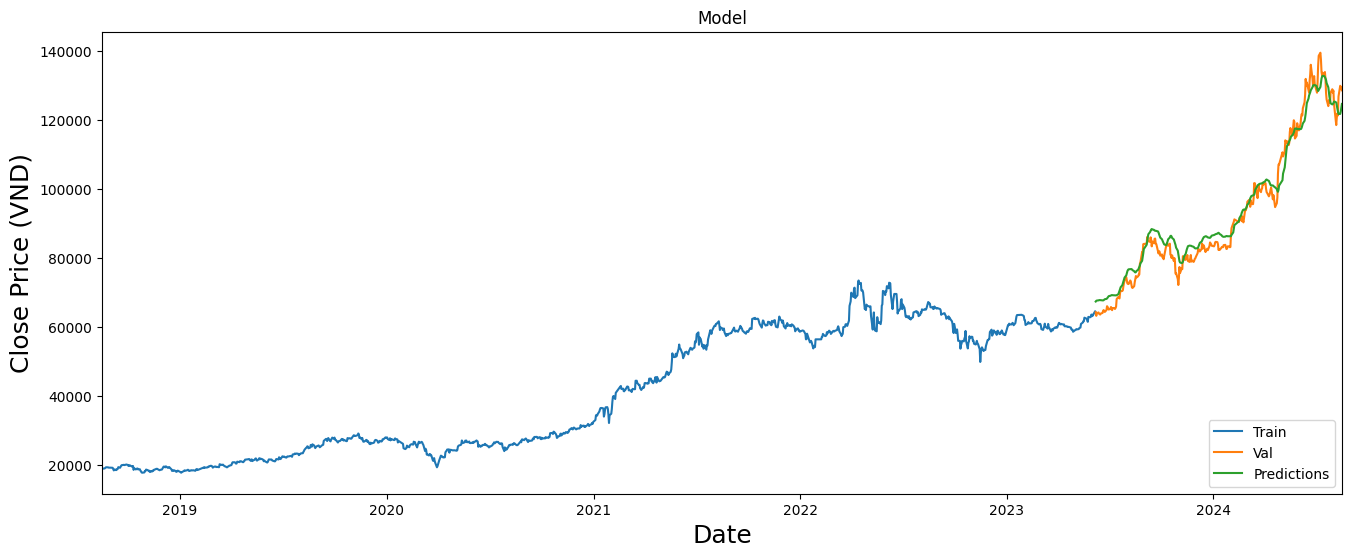

In [104]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xlim(df.index.min(), df.index.max())
plt.show()

In [83]:
valid

,Close,Predictions
Date,,
2024-05-03,109478.26,109946.375000
2024-05-06,110956.52,107621.710938
2024-05-07,114173.91,109813.546875
2024-05-08,113913.05,113215.960938
2024-05-09,113304.35,111960.179688
...,...,...
2024-08-09,126900.00,119427.656250
2024-08-12,130000.00,126667.476562
2024-08-13,129700.00,128755.765625


In [44]:
exit()

: 